<a href="https://colab.research.google.com/github/ThomasNgVn/Beijing-Housing-Prices-Analysing-and-Predicting/blob/main/BejingHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM**

Automatical predicting housing price

**PRESENT SOLUTION**

Predicting house price by expert, it take lots of time and money. They use complicate rules, and their estimate is not great. Their error rate is about 20%

**SOLUTION**
Build a model based on supervised learning. It is multivariable regression task to predict house price.
Metric:
RMSE


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive//My Drive/Dataset/new.csv'
df = pd.read_csv(path,encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

**TAKE A QUICK LOOK AT DATA PICTURE**



In [ ]:
df.head()


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [ ]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


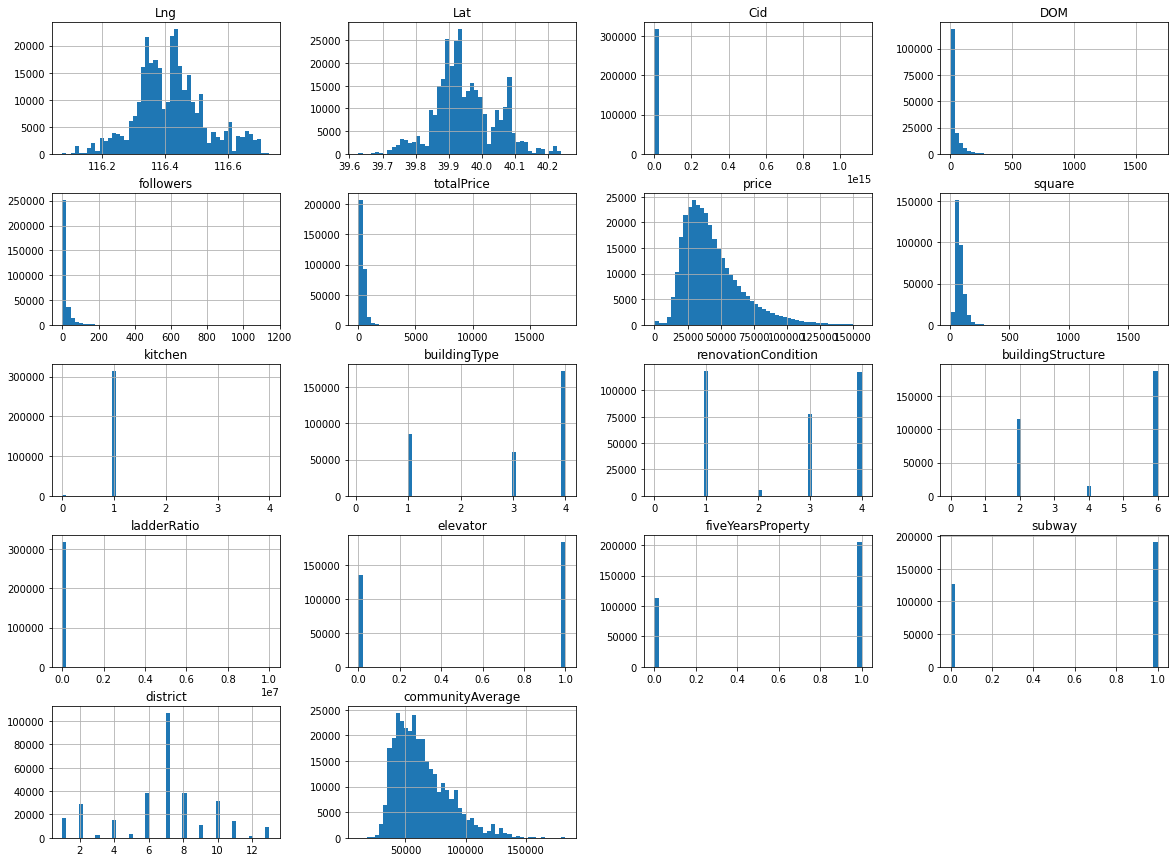

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()


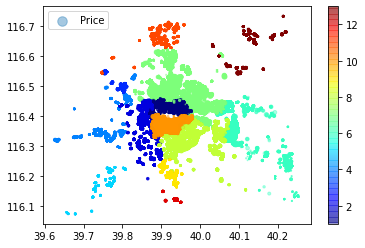

In [ ]:
fig = plt.scatter(x=df['Lat'], y=df['Lng'], alpha=0.4, \
    s=df['totalPrice']/100, label='Price', \
    c=df['district'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.legend()
plt.show()

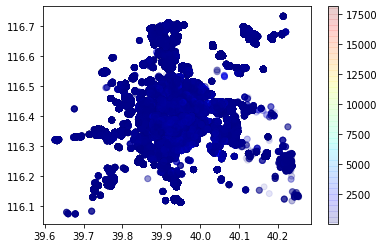

In [ ]:
fig = plt.scatter(x=df['Lat'], y=df['Lng'], alpha=0.1, \
                       c= df['totalPrice'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)

**WRANGLING DATA**


In [ ]:
#Change type of data
df['tradeTime'] =pd.to_datetime(df['tradeTime'])
df['constructionTime']=pd.to_datetime(df['constructionTime'], format= '%Y',errors='coerce')
df['livingRoom']=pd.to_numeric(df['livingRoom'],errors='coerce')
df['drawingRoom']=pd.to_numeric(df['drawingRoom'],errors='coerce')
df['bathRoom']=pd.to_numeric(df['bathRoom'],errors='coerce')

In [ ]:
#Drop unnessary columns
df.drop(['url','id','floor','DOM'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  318851 non-null  float64       
 1   Lat                  318851 non-null  float64       
 2   Cid                  318851 non-null  int64         
 3   tradeTime            318851 non-null  datetime64[ns]
 4   followers            318851 non-null  int64         
 5   totalPrice           318851 non-null  float64       
 6   price                318851 non-null  int64         
 7   square               318851 non-null  float64       
 8   livingRoom           318819 non-null  float64       
 9   drawingRoom          318819 non-null  float64       
 10  kitchen              318851 non-null  int64         
 11  bathRoom             318849 non-null  float64       
 12  buildingType         316830 non-null  float64       
 13  constructionTi

**EXPLORATORY DATA**



In [ ]:
corr_matrix=df.corr()
corr_matrix['totalPrice'].sort_values(ascending=False)

totalPrice             1.000000
price                  0.622658
square                 0.575843
livingRoom             0.434312
communityAverage       0.421428
drawingRoom            0.322706
renovationCondition    0.250890
elevator               0.192345
buildingStructure      0.188114
followers              0.152681
subway                 0.113183
kitchen                0.081393
Lat                    0.019969
district               0.010315
bathRoom               0.000473
Cid                    0.000071
ladderRatio           -0.001063
fiveYearsProperty     -0.003225
buildingType          -0.060346
Lng                   -0.069831
Name: totalPrice, dtype: float64

In [ ]:
#Picking Features
features = ['square','livingRoom','communityAverage','drawingRoom','renovationCondition','elevator','buildingStructure','followers','subway','kitchen','totalPrice']

In [ ]:
df1 = df[features]
df1.head()

,square,livingRoom,communityAverage,drawingRoom,renovationCondition,elevator,buildingStructure,followers,subway,kitchen,totalPrice
0,131.00,2.0,56021.0,1.0,3,1.0,6,106,1.0,1,415.0
1,132.38,2.0,71539.0,2.0,4,1.0,6,126,0.0,1,575.0
2,198.00,3.0,48160.0,2.0,3,1.0,6,48,0.0,1,1030.0
3,134.00,3.0,51238.0,1.0,1,1.0,6,138,0.0,1,297.5
4,81.00,2.0,62588.0,1.0,2,0.0,2,286,1.0,1,392.0


In [ ]:
df1.isnull().sum()

square                   0
livingRoom              32
communityAverage       463
drawingRoom             32
renovationCondition      0
elevator                32
buildingStructure        0
followers                0
subway                  32
kitchen                  0
totalPrice               0
dtype: int64

In [ ]:
df1.dropna(subset=['livingRoom','drawingRoom','elevator','subway'],inplace=True)
mean = df1['communityAverage'].mean()
df1['communityAverage'].fillna(mean,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1.isnull().sum()

square                 0
livingRoom             0
communityAverage       0
drawingRoom            0
renovationCondition    0
elevator               0
buildingStructure      0
followers              0
subway                 0
kitchen                0
totalPrice             0
dtype: int64

In [ ]:
#Label Dataset
X=df1.drop('totalPrice',axis=1)
y = df1.totalPrice

In [ ]:
#Standardize dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split training, test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=68)

**BUIDING MODEL**

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np
yhat=lr.predict(X_train)
lr_mse = mean_squared_error(y_train,yhat)
lr_rmse=np.sqrt(lr_mse)
lr_rmse

133.64535838374093

**Underfiting**

Median_price is bw 205-405, so this result is not satisfied.
This may because of 2 reasons: Features do not have enough information OR the model is not powerful enough.

Try another complex model.



In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1,solver="cholesky")
rid.fit(X_train,y_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [ ]:
yhat=rid.predict(X_train)
rid_mse = mean_squared_error(y_train,yhat)
rid_rmse=np.sqrt(rid_mse)
rid_rmse

133.6453583898229

In [ ]:
#Tree Decision Model
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
yhat=tree.predict(X_train)
tree_mse = mean_squared_error(y_train,yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

16.47539214710189

Tree model sounds good, but it need more evaluation

**Evaluating Models Using Cross-Validation**

In [ ]:
#Evaluate Tree Reg Model 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard deviation:', scores.std())

display_scores(rmse_scores)

Scores: [145.01813535 143.31437384 142.41174744 154.42049007 148.51736797
 149.9320515  144.94344839 143.19824032 141.12295456 144.97235461]
Mean: 145.78511640518622
Standard deviation: 3.8353756308185796


Tree model is overfiting. After evaluating with croos_val_scores, it perform worse than LinearRegression


In [ ]:
#Evaluate LinearRegresstion
scores = cross_val_score(lr, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-scores)
display_scores(lr_rmse_scores)

Scores: [128.25558061 132.15218625 130.11586388 140.67940426 133.77487163
 148.63850404 133.78044836 130.11065627 129.51142215 128.91299071]
Mean: 133.59319281589583
Standard deviation: 6.082725368854253


In [ ]:
#Evaluate Ridge Regresstion
scores = cross_val_score(rid, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rid_rmse_scores = np.sqrt(-scores)
display_scores(rid_rmse_scores)

Scores: [128.25546446 132.15219086 130.11580838 140.67947506 133.77485731
 148.63875112 133.7804484  130.1106052  129.51136401 128.91291975]
Mean: 133.59318845619845
Standard deviation: 6.082820229424108


In [ ]:
#Try another complex model: Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
yhat=forest.predict(X_train)
forest_mse = mean_squared_error(y_train,yhat)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

43.17067162153546

In [ ]:
#Evalute Random Forest model by Cross_val
scores = cross_val_score(forest, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
fr_rmse_scores = np.sqrt(-scores)
display_scores(fr_rmse_scores)

Scores: [108.02106071 105.74708505 105.71618155 118.02551489 110.65108788
 122.08898464 107.74027689 105.90020139 105.44267379 107.58624505]
Mean: 109.69193118541875
Standard deviation: 5.467101695992731


It is better. Random Forest look promissing. Lets fine-tune it to get better results.

**FINE-TUNE MODEL**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)
      

126.83266486057815 {'max_features': 2, 'n_estimators': 3}
118.02687422026182 {'max_features': 2, 'n_estimators': 10}
114.15062595262887 {'max_features': 2, 'n_estimators': 30}
123.23145294118065 {'max_features': 4, 'n_estimators': 3}
115.44994818113285 {'max_features': 4, 'n_estimators': 10}
111.26127663885032 {'max_features': 4, 'n_estimators': 30}
125.39304350123321 {'max_features': 6, 'n_estimators': 3}
114.76930849868947 {'max_features': 6, 'n_estimators': 10}
110.54367149229472 {'max_features': 6, 'n_estimators': 30}
123.3576687058919 {'max_features': 8, 'n_estimators': 3}
113.80398284356113 {'max_features': 8, 'n_estimators': 10}
111.01560666196559 {'max_features': 8, 'n_estimators': 30}
130.28107820337192 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
120.63231802807336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
128.66110490543915 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
118.22134809747608 {'bootstrap': False, 'max_features': 3, 'n_

In [ ]:
final_model = grid_search.best_estimator_
yhat = final_model.predict(X_test)
final_mse = mean_squared_error(y_test,yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

107.64546216307674

It is better, but it require more data to have better result.

In [ ]:
report=pd.DataFrame({'Model':['Linear Regression','Ridge Regression','Tree Decision Regression','RandomForest','FinalModel'],
                     'RMSE':[lr_rmse_scores.mean(),rid_rmse_scores.mean(),rmse_scores.mean(),fr_rmse_scores.mean(),final_rmse],
                     'STD':[lr_rmse_scores.std(),rid_rmse_scores.std(),rmse_scores.std(),fr_rmse_scores.std(),'']})
report

,Model,RMSE,STD
0,Linear Regression,133.593193,6.08273
1,Ridge Regression,133.593188,6.08282
2,Tree Decision Regression,145.785116,3.83538
3,RandomForest,109.691931,5.4671
4,FinalModel,107.645462,
